In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

%matplotlib inline

In [2]:
# various options in pandas
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 3)

In [3]:
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url.. 
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170422, 170429, 170506, 170513]
df = get_data(week_nums)

In [4]:
#check columns names
df.columns.tolist()

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [5]:
df.columns = [column.strip() for column in df.columns]

In [6]:
#combine C/A, UNIT, SCP and STATION into one Key

df['KEY'] = df['C/A'] + ' ' + df['UNIT'] + ' ' + df['SCP'] + ' ' + df['STATION']

In [7]:
#combine date and time and convert to datetime
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format="%m/%d/%Y %H:%M:%S")

In [8]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,00:00:00,REGULAR,6136580,2078941,A002 R051 02-00-00 59 ST,2017-04-15 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,04:00:00,REGULAR,6136613,2078947,A002 R051 02-00-00 59 ST,2017-04-15 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,08:00:00,REGULAR,6136639,2078987,A002 R051 02-00-00 59 ST,2017-04-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,12:00:00,REGULAR,6136799,2079109,A002 R051 02-00-00 59 ST,2017-04-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,16:00:00,REGULAR,6137076,2079173,A002 R051 02-00-00 59 ST,2017-04-15 16:00:00


In [9]:
#identify if any duplicate values exist
(df
 .groupby(["KEY", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,KEY,DATETIME,ENTRIES
109331,G001 R151 00-00-00 CONEY IS-STILLW,2017-05-09 05:00:00,2
323055,N329 R201 00-00-00 WOODHAVEN BLVD,2017-04-28 05:00:00,2
0,A002 R051 02-00-00 59 ST,2017-04-15 00:00:00,1
526517,R145 R032 00-00-02 TIMES SQ-42 ST,2017-04-20 08:00:00,1
526508,R145 R032 00-00-02 TIMES SQ-42 ST,2017-04-18 20:00:00,1


In [10]:
# df.loc[df['KEY'] == 'G001 R151 00-00-00 CONEY IS-STILLW']

In [11]:
#drop 2 duplicates found

df.drop_duplicates(subset=["KEY", "DATETIME"], inplace=True)

In [12]:
df.sort_values(["KEY", "DATETIME"], inplace=True, ascending=True)

In [13]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,00:00:00,REGULAR,6136580,2078941,A002 R051 02-00-00 59 ST,2017-04-15 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,04:00:00,REGULAR,6136613,2078947,A002 R051 02-00-00 59 ST,2017-04-15 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,08:00:00,REGULAR,6136639,2078987,A002 R051 02-00-00 59 ST,2017-04-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,12:00:00,REGULAR,6136799,2079109,A002 R051 02-00-00 59 ST,2017-04-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,16:00:00,REGULAR,6137076,2079173,A002 R051 02-00-00 59 ST,2017-04-15 16:00:00


In [14]:
df['ENTRIES_2'] = df.groupby('KEY')['ENTRIES'].diff()

In [15]:
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

df2 = df.copy()


In [16]:
df.sort_values('ENTRIES_2', ascending=False).head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,DATETIME,ENTRIES_2
22446,C021,R212,00-00-02,59 ST,NRW,BMT,04/21/2017,08:00:00,2031090592,C021 R212 00-00-02 59 ST,2017-04-21 08:00:00,2.021e+09
195481,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,05/05/2017,09:00:00,1560221483,R730 R431 00-00-04 EASTCHSTER/DYRE,2017-05-05 09:00:00,1.558e+09
135682,R161B,R452,00-00-03,72 ST,123,IRT,04/30/2017,13:00:00,691260128,R161B R452 00-00-03 72 ST,2017-04-30 13:00:00,6.832e+08
153362,R241A,R048,00-00-00,GRD CNTRL-42 ST,4567S,IRT,05/04/2017,13:00:00,503289886,R241A R048 00-00-00 GRD CNTRL-42 ST,2017-05-04 13:00:00,4.885e+08
103128,N550,R242,01-05-00,18 AV,F,IND,04/24/2017,16:00:00,117440513,N550 R242 01-05-00 18 AV,2017-04-24 16:00:00,1.174e+08
23499,C026,R215,01-06-01,86 ST,R,BMT,04/18/2017,16:00:00,117484688,C026 R215 01-06-01 86 ST,2017-04-18 16:00:00,1.170e+08
150431,R228,R143,00-00-04,28 ST,6,IRT,04/26/2017,17:00:00,100710462,R228 R143 00-00-04 28 ST,2017-04-26 17:00:00,1.004e+08
166407,R311,R053,00-05-00,3 AV-149 ST,25,IRT,04/28/2017,16:00:00,67108864,R311 R053 00-05-00 3 AV-149 ST,2017-04-28 16:00:00,6.711e+07
16380,B022,R229,00-05-00,AVENUE M,BQ,BMT,04/30/2017,12:00:00,16796105,B022 R229 00-05-00 AVENUE M,2017-04-30 12:00:00,1.673e+07
16085,B022,R229,00-00-00,AVENUE M,BQ,BMT,04/30/2017,11:00:00,16796105,B022 R229 00-00-00 AVENUE M,2017-04-30 11:00:00,1.601e+07


In [17]:
df.sort_values('ENTRIES_2', ascending=True).head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,DATETIME,ENTRIES_2
152949,R240,R047,00-00-01,GRD CNTRL-42 ST,4567S,IRT,05/04/2017,17:00:00,1866,R240 R047 00-00-01 GRD CNTRL-42 ST,2017-05-04 17:00:00,-2.024e+07
16384,B022,R229,00-05-00,AVENUE M,BQ,BMT,05/01/2017,12:00:00,11,B022 R229 00-05-00 AVENUE M,2017-05-01 12:00:00,-1.680e+07
137112,R162,R166,00-00-00,79 ST,1,IRT,04/25/2017,17:00:00,523,R162 R166 00-00-00 79 ST,2017-04-25 17:00:00,-1.666e+07
16086,B022,R229,00-00-00,AVENUE M,BQ,BMT,04/30/2017,12:00:00,789942,B022 R229 00-00-00 AVENUE M,2017-04-30 12:00:00,-1.601e+07
33312,H037,R349,00-00-00,SUTTER AV,L,BMT,05/01/2017,13:00:00,402,H037 R349 00-00-00 SUTTER AV,2017-05-01 13:00:00,-1.182e+07
51398,N070,R012,04-00-03,34 ST-PENN STA,ACE,IND,04/19/2017,16:00:00,1844,N070 R012 04-00-03 34 ST-PENN STA,2017-04-19 16:00:00,-9.416e+06
37448,J024,R437,00-00-00,CRESCENT ST,JZ,BMT,05/02/2017,09:00:00,13,J024 R437 00-00-00 CRESCENT ST,2017-05-02 09:00:00,-7.897e+06
18236,B029,R172,00-00-01,BRIGHTON BEACH,BQ,BMT,04/17/2017,08:00:00,2216,B029 R172 00-00-01 BRIGHTON BEACH,2017-04-17 08:00:00,-6.924e+06
51095,N068,R012,03-06-00,34 ST-PENN STA,ACE,IND,04/20/2017,12:48:17,262186,N068 R012 03-06-00 34 ST-PENN STA,2017-04-20 12:48:17,-6.314e+06
136774,R165,R167,01-00-02,86 ST,1,IRT,04/30/2017,17:00:00,73,R165 R167 01-00-02 86 ST,2017-04-30 17:00:00,-5.962e+06


In [18]:
sum(abs(df.ENTRIES_2) > 10000)/len(df)

7.5971485369158109e-05

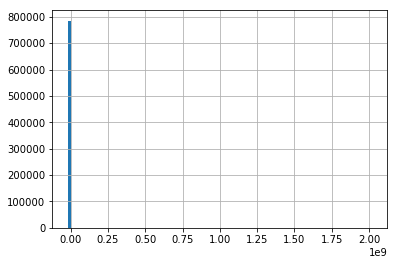

In [19]:
df.ENTRIES_2.hist(bins=100)

In [20]:
def clean_entries(row, max_counter):
    each = row["ENTRIES_2"]
    if each < 0:
        each = -each
    elif each > max_counter:
        return 0
    return each

df2['ENTRIES_2'] = df2.apply(clean_entries, axis=1, max_counter=10000)

In [21]:
df2StationMax = df2.groupby(['KEY','DATETIME']).ENTRIES_2.max()
df2StationMax.sort_values(ascending=False)

KEY                                 DATETIME           
R240 R047 00-00-01 GRD CNTRL-42 ST  2017-05-04 17:00:00    2.024e+07
B022 R229 00-05-00 AVENUE M         2017-05-01 12:00:00    1.680e+07
R162 R166 00-00-00 79 ST            2017-04-25 17:00:00    1.666e+07
B022 R229 00-00-00 AVENUE M         2017-04-30 12:00:00    1.601e+07
H037 R349 00-00-00 SUTTER AV        2017-05-01 13:00:00    1.182e+07
N070 R012 04-00-03 34 ST-PENN STA   2017-04-19 16:00:00    9.416e+06
J024 R437 00-00-00 CRESCENT ST      2017-05-02 09:00:00    7.897e+06
B029 R172 00-00-01 BRIGHTON BEACH   2017-04-17 08:00:00    6.924e+06
N068 R012 03-06-00 34 ST-PENN STA   2017-04-20 12:48:17    6.314e+06
R165 R167 01-00-02 86 ST            2017-04-30 17:00:00    5.962e+06
N063 R011 02-00-00 42 ST-PORT AUTH  2017-05-05 08:00:00    5.439e+06
N319 R298 01-06-01 NORTHERN BLVD    2017-05-02 17:00:00    1.947e+06
R158 R084 00-06-02 59 ST COLUMBUS   2017-04-28 12:00:00    1.559e+06
PTH03 R552 00-00-02 JOURNAL SQUARE  2017-05-12 

In [22]:
df2.sort_values('ENTRIES_2', ascending=False).head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,DATETIME,ENTRIES_2
152949,R240,R047,00-00-01,GRD CNTRL-42 ST,4567S,IRT,05/04/2017,17:00:00,1866,R240 R047 00-00-01 GRD CNTRL-42 ST,2017-05-04 17:00:00,2.024e+07
16384,B022,R229,00-05-00,AVENUE M,BQ,BMT,05/01/2017,12:00:00,11,B022 R229 00-05-00 AVENUE M,2017-05-01 12:00:00,1.680e+07
137112,R162,R166,00-00-00,79 ST,1,IRT,04/25/2017,17:00:00,523,R162 R166 00-00-00 79 ST,2017-04-25 17:00:00,1.666e+07
16086,B022,R229,00-00-00,AVENUE M,BQ,BMT,04/30/2017,12:00:00,789942,B022 R229 00-00-00 AVENUE M,2017-04-30 12:00:00,1.601e+07
33312,H037,R349,00-00-00,SUTTER AV,L,BMT,05/01/2017,13:00:00,402,H037 R349 00-00-00 SUTTER AV,2017-05-01 13:00:00,1.182e+07


In [23]:
df2['TIME_DELTA'] = df2.groupby('KEY')['DATETIME'].diff()

In [24]:
df2.TIME_DELTA.value_counts()

0 days 04:00:00    720784
0 days 04:12:00     49550
0 days 08:00:00       959
0 days 04:26:00       627
0 days 00:01:20       365
0 days 00:01:21       195
0 days 00:01:33        66
0 days 00:01:25        65
0 days 04:11:59        51
0 days 00:01:31        51
0 days 00:01:41        49
0 days 00:01:22        47
0 days 03:59:59        45
0 days 00:01:05        42
0 days 00:01:36        42
0 days 12:00:00        38
0 days 04:00:01        37
0 days 00:01:23        36
0 days 00:01:14        36
0 days 00:01:19        32
0 days 00:01:07        30
0 days 00:57:10        28
0 days 01:11:54        28
0 days 00:01:29        27
0 days 00:05:31        27
                    ...  
0 days 02:38:33         1
0 days 04:14:21         1
0 days 04:07:31         1
0 days 04:11:12         1
0 days 04:38:01         1
0 days 04:09:57         1
0 days 02:55:40         1
0 days 04:01:58         1
0 days 04:17:13         1
0 days 04:09:14         1
1 days 22:12:00         1
0 days 04:05:36         1
0 days 04:01

In [25]:
# 720784/len(df2)

In [26]:
df2_station_dt = df2.groupby(['STATION','DATE','DATETIME'])['ENTRIES_2'].sum().reset_index()

df2_station_dt.sort_values('ENTRIES_2', ascending=False)

,STATION,DATE,DATETIME,ENTRIES_2
54591,GRD CNTRL-42 ST,05/04/2017,2017-05-04 17:00:00,2.025e+07
27224,AVENUE M,05/01/2017,2017-05-01 12:00:00,1.680e+07
21515,79 ST,04/25/2017,2017-04-25 17:00:00,1.666e+07
27218,AVENUE M,04/30/2017,2017-04-30 12:00:00,1.601e+07
106806,SUTTER AV,05/01/2017,2017-05-01 13:00:00,1.182e+07
13674,34 ST-PENN STA,04/19/2017,2017-04-19 16:00:00,9.434e+06
43330,CRESCENT ST,05/02/2017,2017-05-02 09:00:00,7.899e+06
32665,BRIGHTON BEACH,04/17/2017,2017-04-17 08:00:00,6.926e+06
13686,34 ST-PENN STA,04/20/2017,2017-04-20 12:48:17,6.316e+06
22966,86 ST,04/30/2017,2017-04-30 17:00:00,5.965e+06


In [27]:
df2_station_daily = df2.groupby(['STATION', 'DATE']).ENTRIES_2.sum()

df2_station_daily.sort_values(ascending=False)

STATION          DATE      
GRD CNTRL-42 ST  05/04/2017    2.040e+07
AVENUE M         05/01/2017    1.680e+07
79 ST            04/25/2017    1.668e+07
AVENUE M         04/30/2017    1.601e+07
SUTTER AV        05/01/2017    1.183e+07
34 ST-PENN STA   04/19/2017    9.597e+06
CRESCENT ST      05/02/2017    7.902e+06
BRIGHTON BEACH   04/17/2017    6.934e+06
34 ST-PENN STA   04/20/2017    6.447e+06
86 ST            04/30/2017    6.000e+06
42 ST-PORT AUTH  05/05/2017    5.548e+06
NORTHERN BLVD    05/02/2017    1.954e+06
59 ST COLUMBUS   04/28/2017    1.639e+06
JOURNAL SQUARE   05/12/2017    1.383e+06
LEXINGTON AV/53  04/24/2017    9.376e+05
NEWARK BM BW     04/25/2017    8.861e+05
LIVONIA AV       04/25/2017    6.588e+05
PATH NEW WTC     04/30/2017    5.957e+05
GROVE STREET     05/02/2017    5.121e+05
9TH STREET       04/16/2017    4.696e+05
79 ST            04/21/2017    3.719e+05
PATH NEW WTC     04/24/2017    2.954e+05
CANARSIE-ROCKAW  05/10/2017    2.760e+05
JOURNAL SQUARE   04/25/2017  

In [28]:
df3 = df2.groupby('STATION').ENTRIES_2.sum().sort_values(ascending = False).reset_index()